In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [213]:
df = pd.read_csv("/content/daily-total-births-CA.csv", parse_dates=['date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
 1   y       365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

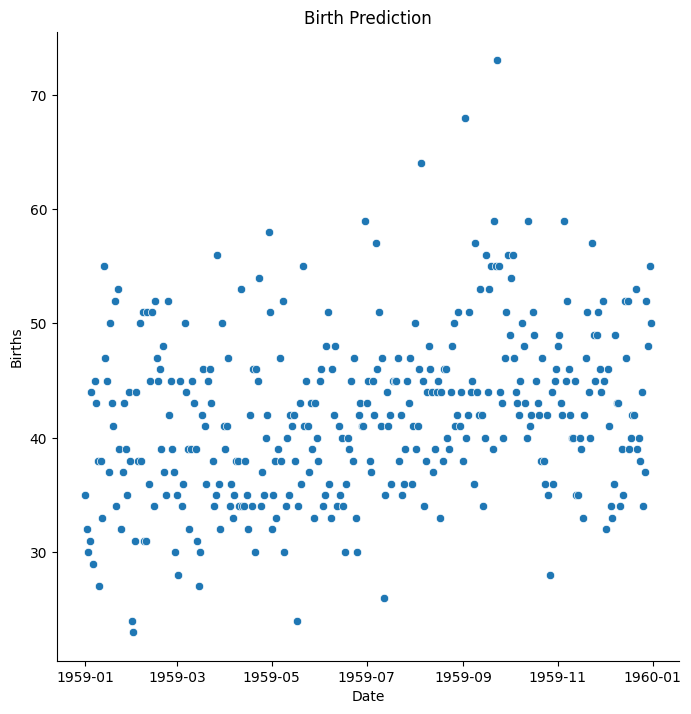

In [215]:
#pair plot
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['ds'],y_vars=['y'],size=7,kind='scatter')
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Birth Prediction')
plt.show()

In [216]:
x=df['ds']
x.head()
y=df['y']
y.head()

0    35
1    32
2    30
3    31
4    44
Name: y, dtype: int64

Text(0.5, 1.0, 'Daily Female Births in 1959')

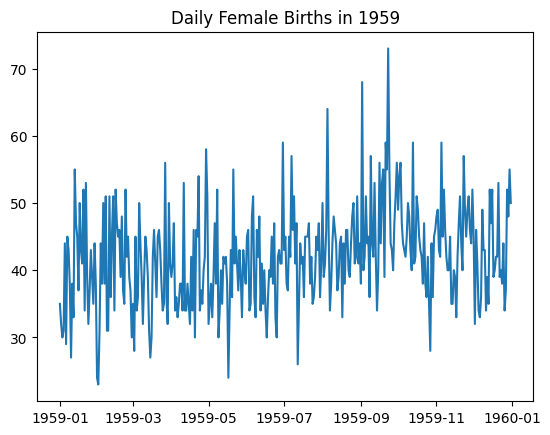

In [217]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')

In [218]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = prophet.Prophet(yearly_seasonality=True, daily_seasonality=False,
                          changepoint_range=0.9,
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df)
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5f5y9e0o/4e9_oxu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5f5y9e0o/yo825ouk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8647', 'data', 'file=/tmp/tmp5f5y9e0o/4e9_oxu6.json', 'init=/tmp/tmp5f5y9e0o/yo825ouk.json', 'output', 'file=/tmp/tmp5f5y9e0o/prophet_modele7dhwpj5/prophet_model-20231129192639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


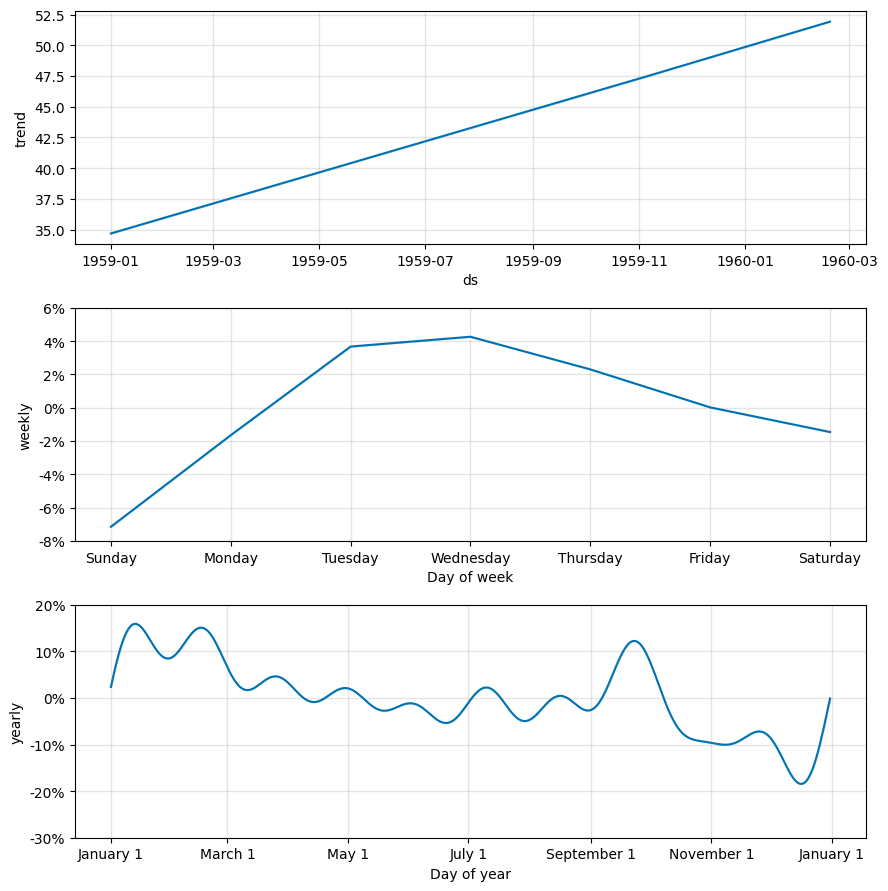

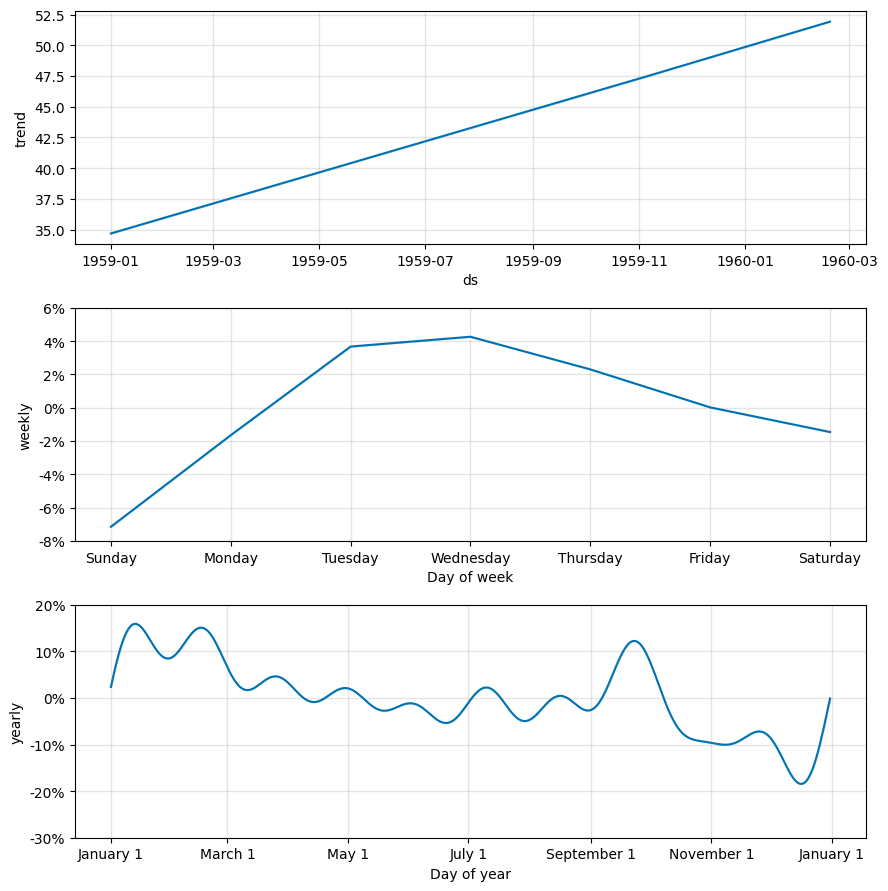

In [219]:
m.plot_components(forecast)

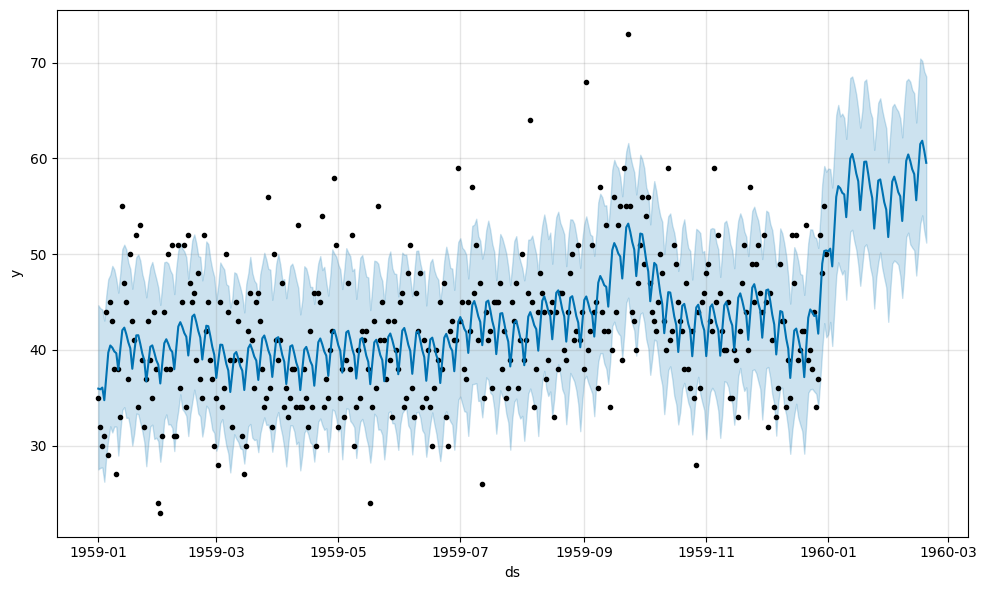

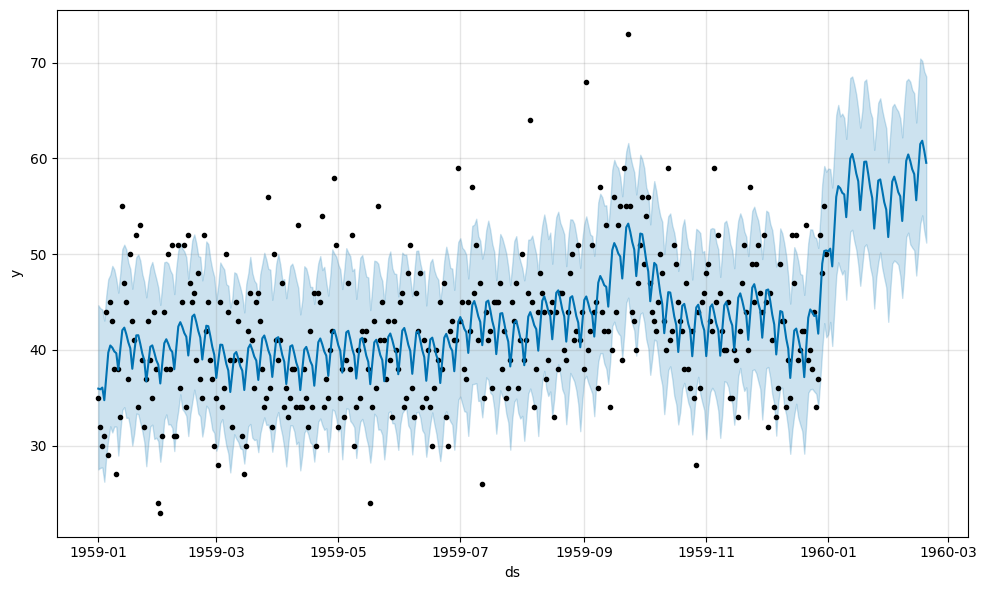

In [220]:
m.plot(forecast)

In [221]:
# Convert the 'Date' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

In [222]:
# Extract features from the date
df['DayOfWeek'] = df['ds'].dt.dayofweek.astype(np.float64)
df['Month'] = df['ds'].dt.month.astype(np.float64)
df['DayOfMonth'] = df['ds'].dt.day.astype(np.float64)

In [223]:
# Drop the original 'Date' column
df = df.drop(['ds'], axis=1)

In [224]:
# Define features (X) and target variable (y)
X = df.drop(['y'], axis=1).values.astype(np.float64)
y = df['y'].values.astype(np.float64)

In [225]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [226]:
# Create a linear regression model
model = LinearRegression()

In [227]:
# Train the model
model.fit(x_train_scaled, y_train)

LinearRegression()

In [228]:
# Make predictions
y_pred = model.predict(x_test_scaled)

In [229]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

In [230]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}')

Linear Regression - Mean Squared Error: 48.93075266610307
Decision Tree - Mean Squared Error: 76.25454545454545
Random Forest - Mean Squared Error: 54.148446363636346
Support Vector Machine - Mean Squared Error: 49.25285015717544


In [231]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 49.25285015717544


In [232]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 7.02


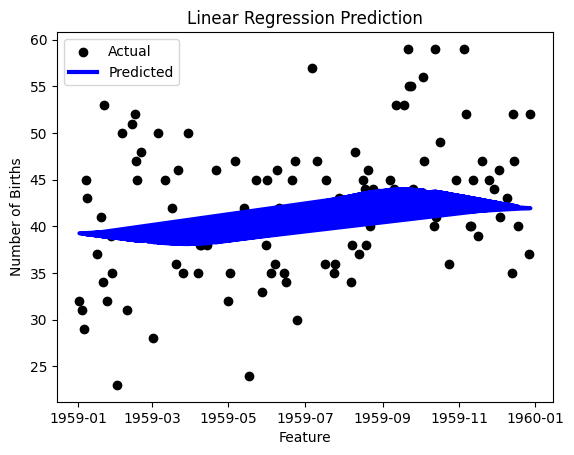

In [233]:
#Linear Regression Prediction
plt.scatter(x_test, y_test, color='black', label='Actual')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Number of Births')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

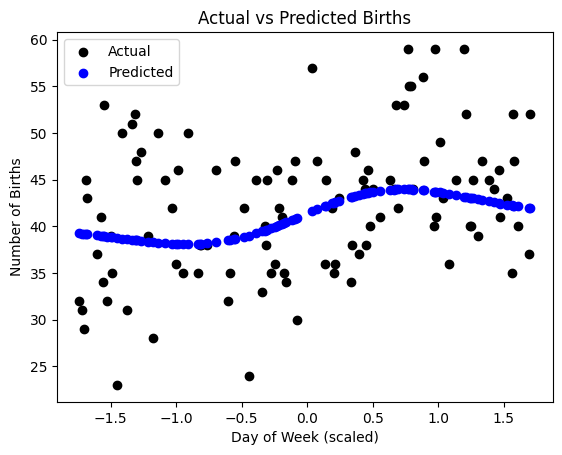

In [234]:
plt.scatter(x_test_scaled[:, 0], y_test, color='black', label='Actual')
plt.scatter(x_test_scaled[:, 0], y_pred, color='blue', label='Predicted')
plt.xlabel('Day of Week (scaled)')
plt.ylabel('Number of Births')
plt.title('Actual vs Predicted Births')
plt.legend()
plt.show()